## OpenAI API-key test

In [32]:
import os
os.getcwd()
os.chdir('/Users/gg/Documents/research/gazingev/llm')

In [34]:
from openai import AzureOpenAI
import base64
import configparser

gg_config = configparser.ConfigParser()
gg_config.read('./ggapikey.ini')

azureconfig = gg_config['azure_openai']

# Set up the Azure OpenAI client
client = AzureOpenAI(
    api_key = azureconfig['azure_openai_gpt4o_api_key'],  
    api_version = azureconfig['azure_openai_gpt4o_api_version'],
    azure_endpoint = azureconfig['azure_openai_gpt4o_endpoint']
)

# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Get text prompt from user
text_prompt = input("Enter your text prompt: ")

# Ask if user wants to include an image
include_image = input("Do you want to include an image? (yes/no): ").lower()

messages = [
    {"role": "system", "content": "You are a helpful assistant that can analyze images."},
    {"role": "user", "content": [{"type": "text", "text": text_prompt}]}
]

if include_image == 'yes':
    # Get image filename from user
    image_filename = input("Enter the image filename (e.g., test.jpg): ")
    image_path = f"./{image_filename}"
    
    try:
        base64_image = encode_image(image_path)
        messages[1]["content"].append({
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
        })
    except FileNotFoundError:
        print(f"Error: The file '{image_filename}' was not found.")
        exit(1)
    except Exception as e:
        print(f"An error occurred while processing the image: {str(e)}")
        exit(1)

# Create the API call
response = client.chat.completions.create(
    model="gpt-4o",  # Use the name you gave to your GPT-4o deployment
    messages=messages,
    max_tokens=300
)

# Print the response
print(response.choices[0].message.content)

The image shows a paper with a printed 7x9 checkerboard pattern, seemingly intended for camera calibration purposes. Each square on the checkerboard measures 20.02 mm and it is printed to life-size on A4 paper according to the text on the right side of the sheet. The paper is positioned on a black surface, and there are other items around it, such as a red and white decorative object on top and a brown folder or book beneath. The lighting appears to be from a bright source, possibly an overhead light or a window, creating reflections on the black surface and illuminating the scene.


In [35]:
# Test a text-to-image diffusion unet
import torch
# use mps on the mac for gpu acceleration
device = torch.device("mps")
# Use HuggingFace Diffusers Library
from diffusers import StableDiffusionPipeline
import torch

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


100%|██████████| 50/50 [00:10<00:00,  5.00it/s]


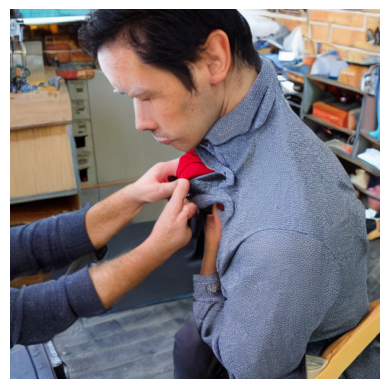

In [11]:
# generate an image from text
prompt = "a photo of an astronaut riding a horse on mars"
prompt = "Trump waving the Ameraican flag"
image = pipe(prompt).images[0]
# image.save("./astronaut_rides_horse.png")
# Display the image using matplotlib without the axis and boarder
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(image)

In [20]:
import os

try:
    print("Current working directory:", os.getcwd())
except FileNotFoundError:
    # Change to a known valid directory, like the user's home directory
    os.chdir(os.path.expanduser("~"))
    print("Changed to home directory:", os.getcwd())

Changed to home directory: /Users/gg
